In [1]:
import scipy
import scipy.special as sp
import numpy as np
import math
import cmath
import matplotlib
import matplotlib.pyplot as plt

n_co=1.4705+3.45e-7j      # core refractive index
n_cl=1.45+1.03e-08j    # effectivecladding refractive index, 20%YLF,80%Cytop
a=62.5           # core radius, um
a_cl=200
lamda=1.020    # wavelenggth, um
ang_resolution=0.02
R_resolution=0.01

## Some calculations##
V=2*math.pi/lamda*a*np.sqrt(np.square(n_co)-np.square(n_cl)) # V number of the fiber
delta=(np.square(n_co)-np.square(n_cl))/(2*np.square(n_co))  # profile height prameter
k=2*math.pi/lamda
#v=1



In [2]:
def updateParameters():
    global v,V,delta,k,U,W,v,b1,b2,F1,F2,a1,a2,a3,a4,a5,a6
    ## Some parameters of the fiber##
    V=2*math.pi/lamda*a*np.sqrt(np.square(n_co)-np.square(n_cl)) # V number of the fiber (waveguide parameter)
    delta=(np.square(n_co)-np.square(n_cl))/(2*np.square(n_co))  # profile height prameter
    k=2*math.pi/lamda

    # Core parameter U
    U=a*np.sqrt(np.square(k*n_co)-np.square(beta))

    # Cladding parameter W
    W=a*np.sqrt(np.square(beta)-np.square(k*n_cl))

    # Some parameters calculation. Details are in 'Optical waveguide theory'  
    b1=1/(2*U)*(sp.jv(v-1,U)/sp.jv(v,U)-sp.jv(v+1,U)/sp.jv(v,U))
    b2=-1/(2*W)*(sp.kv(v-1,W)/sp.kv(v,W)+sp.kv(v+1,W)/sp.kv(v,W))
    F1=np.square(U*W/V)*(b1+(1-2*delta)*b2)/v
    F2=np.square(V/(U*W))*v/(b1+b2)
    a1=(F2-1)/2
    a2=(F2+1)/2
    a3=(F1-1)/2
    a4=(F1+1)/2
    a5=(F1-1+2*delta)/2
    a6=(F1+1-2*delta)/2

In [3]:
R0=1
def e_r(x,p,v):
    if x<=R0:
        if v%2==0:
            return -(a1*sp.jv(v-1,U*x)+a2*sp.jv(v+1,U*x))/sp.jv(v,U)*math.cos(v*p)
        else:
            return -(a1*sp.jv(v-1,U*x)+a2*sp.jv(v+1,U*x))/sp.jv(v,U)*math.sin(v*p)
    elif R0<x:
        if v%2==0:
            return -U/W*(a1*sp.kv(v-1,W*x)-a2*sp.kv(v+1,W*x))/sp.kv(v,W)*math.cos(v*p)
        else:
            return -U/W*(a1*sp.kv(v-1,W*x)-a2*sp.kv(v+1,W*x))/sp.kv(v,W)*math.sin(v*p)
    else:
        return "wrong"

def e_phi(x,p,v):
    if x<=R0:
        if v%2==0:
            return -(a1*sp.jv(v-1,U*x)-a2*sp.jv(v+1,U*x))/sp.jv(v,U)*(-math.sin(v*p))
        else:
            return -(a1*sp.jv(v-1,U*x)-a2*sp.jv(v+1,U*x))/sp.jv(v,U)*math.cos(v*p)
    elif R0<x:
        if v%2==0:
            return -U/W*(a1*sp.kv(v-1,W*x)+a2*sp.kv(v+1,W*x))/sp.kv(v,W)*(-math.sin(v*p))
        else:
            return -U/W*(a1*sp.kv(v-1,W*x)+a2*sp.kv(v+1,W*x))/sp.kv(v,W)*math.cos(v*p)
    else:
        return "wrong"
    
def e_z(x,p,v):
    if x<=R0:
        if v%2==0:
            return -1j*U/(R0*beta)*sp.jv(v,U*x)/sp.jv(v,U)*math.cos(v*p)
        else:
            return -1j*U/(R0*beta)*sp.jv(v,U*x)/sp.jv(v,U)*math.sin(v*p)
    elif R0<x:
        if v%2==0:
            return -1j*U/(R0*beta)*sp.kv(v,W*x)/sp.kv(v,W)*math.cos(v*p)
        else:
            return -1j*U/(R0*beta)*sp.kv(v,W*x)/sp.kv(v,W)*math.sin(v*p)
    else:
        return "wrong"  
    
def S_z(x,p,v):
    if x<=R0:
        if v%2==0:
            return k*n_co*n_co/(beta*np.square(sp.jv(v,U)))*(a1*a3*np.square(sp.jv(v-1,U*x))+a2*a4*np.square(sp.jv(v+1,U*x))-(1-F1*F2)/2*sp.jv(v-1,U*x)*sp.jv(v+1,U*x)*math.cos(2*v*p))
        else:
            return k*n_co*n_co/(beta*np.square(sp.jv(v,U)))*(a1*a3*np.square(sp.jv(v-1,U*x))+a2*a4*np.square(sp.jv(v+1,U*x))+(1-F1*F2)/2*sp.jv(v-1,U*x)*sp.jv(v+1,U*x)*math.cos(2*v*p))
    elif R0<x:
        if v%2==0:
            return k*n_co*n_co/(beta*np.square(sp.kv(v,W)))*np.square(U/W)*(a1*a5*np.square(sp.kv(v-1,W*x))+a2*a6*np.square(sp.kv(v+1,W*x))+(1-2*delta-F1*F2)/2*sp.kv(v-1,W*x)*sp.kv(v+1,W*x)*math.cos(2*v*p))
        else:
            return k*n_co*n_co/(beta*np.square(sp.kv(v,W)))*np.square(U/W)*(a1*a5*np.square(sp.kv(v-1,W*x))+a2*a6*np.square(sp.kv(v+1,W*x))-(1-2*delta-F1*F2)/2*sp.kv(v-1,W*x)*sp.kv(v+1,W*x)*math.cos(2*v*p))
    else:
        return "wrong"

In [4]:
def polar_plot(r,p,data,min,max):
    #generate the mesh
    phi_grid, r_grid = np.meshgrid(p,r)
    xg, yg = r_grid*np.cos(phi_grid), r_grid*np.sin(phi_grid)
    #matplotlib.colors.Normalize(vmin=-2.,vmax=2.)
    plt.pcolormesh(xg,yg,data,vmin=min,vmax=max)
    

def test_plot(r,p,data):
    #generate the mesh
    phi_grid, r_grid = np.meshgrid(p,r)
    xg, yg = r_grid*np.cos(phi_grid), r_grid*np.sin(phi_grid)
    #matplotlib.colors.Normalize(vmin=-2.,vmax=2.)
    plt.pcolormesh(xg,yg,data)
    plt.colorbar()
    
def circle_int(r,p,data):
    #generate the mesh
    phi_grid, r_grid = np.meshgrid(p,r)
    xg, yg = r_grid*np.cos(phi_grid), r_grid*np.sin(phi_grid)
    #matplotlib.colors.Normalize(vmin=-2.,vmax=2.)
    return scipy.interpolate.RectBivariateSpline(xg,yg,data)
    


In [5]:
#Gaussian beam profile
wz = 30 #beam radius, um
GsP = 10000 #Power of Gaussian beam, unit TBD
GsK = np.sqrt(2*GsP/np.pi)/wz #parameter used for Gaussian expression

def GaussianR(r,p):
    return GsK*np.exp(-np.square(r*a/wz))*np.sin(p)
def GaussianP(r,p):
    return GsK*np.exp(-np.square(r*a/wz))*np.cos(p)

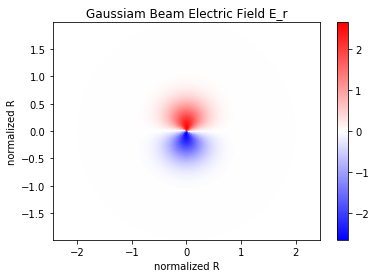

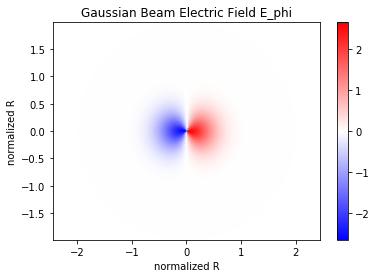

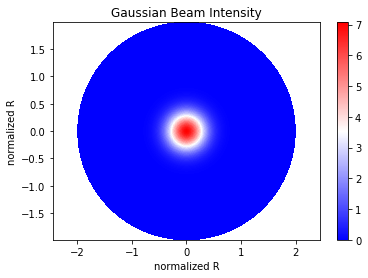

In [13]:
phi=np.arange(0,2*np.pi,ang_resolution)
R=np.arange(0,2,R_resolution)
r_size=len(R)
phi_size=len(phi)
yr=[]
yp=[]
yii=[]
for i in R:
    for m in phi:
        yir=GaussianR(i,m)
        yr.append(yir)
        yip=GaussianP(i,m)
        yp.append(yip)
        ii=yir*yir+yip*yip
        yii.append(ii)

YR=np.array(yr)
YP=np.array(yp)
YII=np.array(yii)
GR=YR.reshape(r_size,phi_size)
plt.figure(1)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('Gaussiam Beam Electric Field E_r')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.real)
test_plot(R,phi,GR.real)

plt.figure(2)
GP=YP.reshape(r_size,phi_size)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('Gaussian Beam Electric Field E_phi')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.imag)
test_plot(R,phi,GP.real)

plt.figure(3)
GSI=YII.reshape(r_size,phi_size)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('Gaussian Beam Intensity')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.imag)
test_plot(R,phi,GSI.real)


In [6]:
phi=np.arange(0,2*np.pi,ang_resolution)
R=np.arange(0,2,R_resolution)
r_size=len(R)
phi_size=len(phi)


In [17]:
def Hvmt(v,beta):
    yii=[]
    ir=[]
    ip=[]
    iz=[]
    II=np.zeros((4,r_size*phi_size))
    for i in R:
        for m in phi:
            yir=e_r(i,m,v)
            yip=e_phi(i,m,v)
            yiz=e_z(i,m,v)
            ii=yir*yir+yip*yip
            yii.append(ii.real)
            ir.append(yir)
            ip.append(yip)
            iz.append(yiz)
    II[0]=np.array(yii)
    II[1]=np.array(ir)
    II[2]=np.array(ip)
    II[3]=np.array(iz)
    return II

def Evm(i,m,v,beta,z):
    E=np.zeros(3)
    #updateParameters()
    E[0]=e_r(i,m,v)*np.exp(1j*beta*z)#Er
    E[1]=e_phi(i,m,v)*np.exp(1j*beta*z)#Ep
    E[2]=e_z(i,m,v)*np.exp(1j*beta*z)#Ez
    return E

In [18]:
beta1=9.058178549970200777e+00+2.114772925852090580e-06j
beta3=9.057837253471003436e+00+2.114772925852090580e-06j
beta5=9.057222919772449643e+00+2.114772925852090580e-06j


In [31]:
# E.E* along the z 
length=np.arange(0,5,1) #length=1000um
R=np.arange(0,5,0.0001)
#R=np.arange(0,0.05,0.001)

beta1=9.058178549970200777e+00+2.114772925852090580e-06j
beta=beta1
v=1
updateParameters()

Er=[]
Ep=[]
Ez=[]
Etest=[]
for z in length:
    Etemp=Evm(0,0,1,beta,z)
    Er.append(Etemp[0])
    Ep.append(Etemp[1])
    Ez.append(Etemp[2])
    Etest.append(Etemp)

E11=Etest




C:\Users\Xiaojing\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Xiaojing\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Xiaojing\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


In [34]:
Etemp=Evm(0,0,1,beta,0)
Etemp

C:\Users\Xiaojing\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Xiaojing\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Xiaojing\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


array([0.       , 1.9009298, 0.       ])

In [30]:
E11[1][1]

-1.774530090998963

C:\Users\Xiaojing\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Xiaojing\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Xiaojing\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


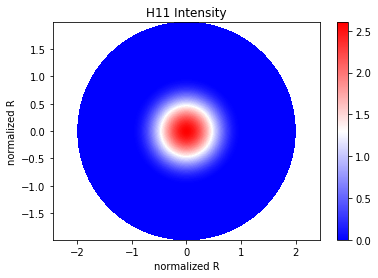

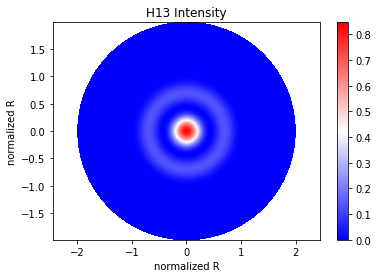

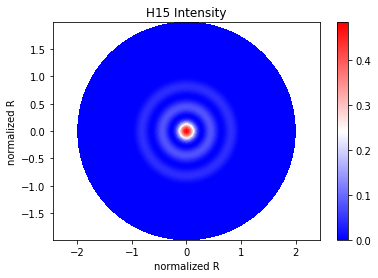

In [14]:
#10.8
beta1=9.058178549970200777e+00+2.114772925852090580e-06j
beta=beta1
v=1
updateParameters()
H11=Hvmt(v,beta)
a11=0.8485282491748883
plt.figure(1)
I11=H11[0]*a11*a11
H1=I11.reshape(r_size,phi_size)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('H11 Intensity')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.imag)
test_plot(R,phi,H1.real)

beta3=9.057837253471003436e+00+2.114772925852090580e-06j
beta=beta3
v=1
updateParameters()
H13=Hvmt(v,beta)
a13=-0.3158405330169875
plt.figure(2)
I13=H13[0]*a13*a13
H3=I13.reshape(r_size,phi_size)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('H13 Intensity')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.imag)
test_plot(R,phi,H3.real)



beta5=9.057222919772449643e+00+2.114772925852090580e-06j
beta=beta5
v=1
updateParameters()
H15=Hvmt(v,beta)
a15=0.03586643719538985
plt.figure(4)
I15=H15[0]*a15
H5=I15.reshape(r_size,phi_size)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('H15 Intensity')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.imag)
test_plot(R,phi,H5.real)








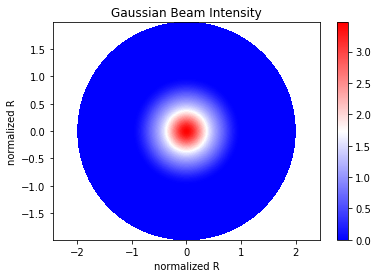

In [15]:
I_total=H11[0]*a11*a11+H13[0]*a13*a13+H15[0]*a15*a15
#I_total=H11[0]*a11+H13[0]*a13+H14[0]*a14+H15[0]*a15
plt.figure(1)
TI=I_total.reshape(r_size,phi_size)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('Gaussian Beam Intensity')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.imag)
test_plot(R,phi,TI.real)

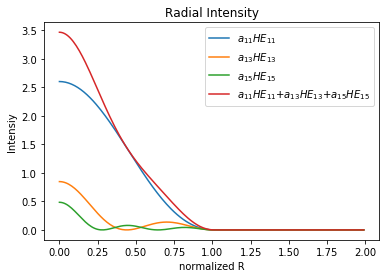

In [16]:
plt.figure()
plt.plot(R,H1[:,0],label='$a_{11}HE_{11}$')
plt.plot(R,H3[:,0],label='$a_{13}HE_{13}$')
plt.plot(R,H5[:,0],label='$a_{15}HE_{15}$')         
plt.plot(R,TI[:,0],label='$a_{11}HE_{11}$+$a_{13}HE_{13}$+$a_{15}HE_{15}$')
plt.xlabel('normalized R')
plt.ylabel('Intensiy')
plt.title('Radial Intensity')
plt.legend()

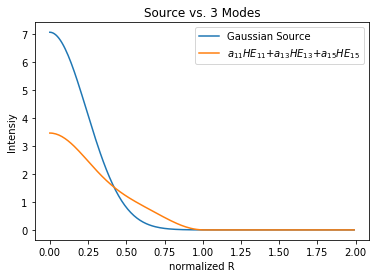

In [17]:
plt.figure()
plt.plot(R,GSI[:,0],label='Gaussian Source')
plt.plot(R,TI[:,0],label='$a_{11}HE_{11}$+$a_{13}HE_{13}$+$a_{15}HE_{15}$')
plt.xlabel('normalized R')
plt.ylabel('Intensiy')
plt.title('Source vs. 3 Modes')
plt.legend()

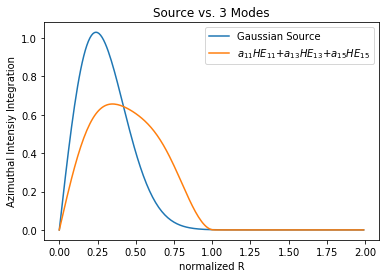

In [18]:
plt.figure()
plt.plot(R,GSI[:,0]*R,label='Gaussian Source')
plt.plot(R,TI[:,0]*R,label='$a_{11}HE_{11}$+$a_{13}HE_{13}$+$a_{15}HE_{15}$')
plt.xlabel('normalized R')
plt.ylabel('Azimuthal Intensiy Integration')
plt.title('Source vs. 3 Modes')
plt.legend()

In [23]:
sum(GSI[:,0]*R)

6364.871266647621

In [24]:
sum(TI[:,0]*R)

6314.527017854493

In [25]:
sum(TI[:,0]*R)/sum(GSI[:,0]*R)

0.9920902958309722

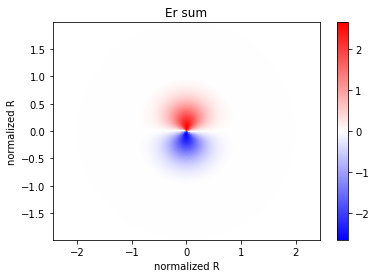

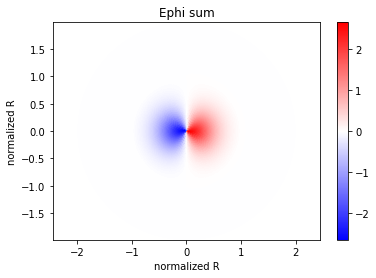

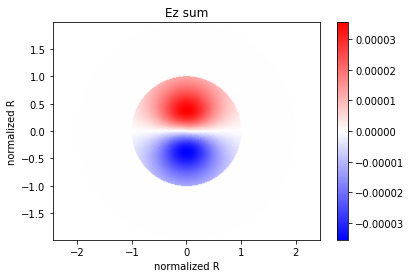

In [20]:
Etotalr=H11[1]*a11+H13[1]*a13+H15[1]*a15
Etotalp=H11[2]*a11+H13[2]*a13+H15[2]*a15
Etotalz=H11[3]*a11+H13[3]*a13+H15[3]*a15
plt.figure(1)
Tr=Etotalr.reshape(r_size,phi_size)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('Er sum')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.imag)
test_plot(R,phi,Tr.real)

plt.figure(2)
Tp=Etotalp.reshape(r_size,phi_size)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('Ephi sum')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.imag)
test_plot(R,phi,Tp.real)

plt.figure(3)
Tz=Etotalz.reshape(r_size,phi_size)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('Ez sum')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.imag)
test_plot(R,phi,Tz.real)

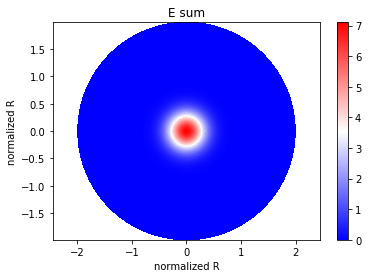

In [21]:
transverse_energy=Etotalr*Etotalr+Etotalp*Etotalp

plt.figure(1)
Ti=transverse_energy.reshape(r_size,phi_size)
plt.xlabel('normalized R')
plt.ylabel('normalized R')
plt.title('E sum')
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('electric field E_phi')
#polar_plot(R,phi,Ep.imag)
test_plot(R,phi,Ti.real)

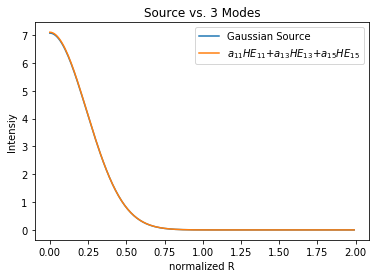

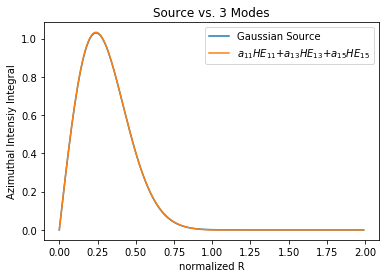

In [22]:
plt.figure(1)
plt.plot(R,GSI[:,0],label='Gaussian Source')
plt.plot(R,Ti[:,0],label='$a_{11}HE_{11}$+$a_{13}HE_{13}$+$a_{15}HE_{15}$')
plt.xlabel('normalized R')
plt.ylabel('Intensiy')
plt.title('Source vs. 3 Modes')
plt.legend()
plt.figure(2)
plt.plot(R,GSI[:,0]*R,label='Gaussian Source')
plt.plot(R,Ti[:,0]*R,label='$a_{11}HE_{11}$+$a_{13}HE_{13}$+$a_{15}HE_{15}$')
plt.xlabel('normalized R')
plt.ylabel('Azimuthal Intensiy Integral')
plt.title('Source vs. 3 Modes')
plt.legend()

In [23]:
sum(Ti[:,0]*R)/sum(GSI[:,0]*R)

1.002707418687474

Text(0.5,1,'Source vs. 3 Modes')

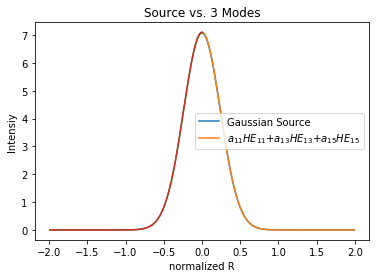

In [24]:
plt.figure(1)
plt.plot(R,GSI[:,0],label='Gaussian Source')
plt.plot(R,Ti[:,0],label='$a_{11}HE_{11}$+$a_{13}HE_{13}$+$a_{15}HE_{15}$')
plt.legend()
plt.plot(-R,GSI[:,0],label='Gaussian Source')
plt.plot(-R,Ti[:,0],label='$a_{11}HE_{11}$+$a_{13}HE_{13}$+$a_{15}HE_{15}$')
plt.xlabel('normalized R')
plt.ylabel('Intensiy')
plt.title('Source vs. 3 Modes')


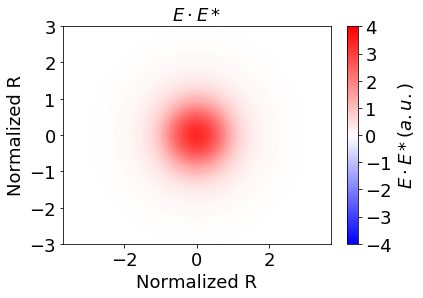

In [49]:
from matplotlib.colors import ListedColormap
plt.figure(1)
plt.xlabel('Normalized R', fontsize=18)
plt.ylabel('Normalized R',fontsize=18)
plt.title('$E\cdot E*$',fontsize=18)
plt.axis('equal')
plt.set_cmap('bwr')
#plt.ylabel('E.E*')
#polar_plot(R,phi,Szz.real,-5,5)
polar_plot(R,phi,EE.real,-4,4)
cbar=plt.colorbar(label='$E\cdot E* (a.u.)$')
plt.tick_params(labelsize=18)
#cbar.set_label('$E\cdot E* (a.u.)$', rotation=270,fontsize=18)
ax = cbar.ax
text = ax.yaxis.label
font = matplotlib.font_manager.FontProperties(size=18)
text.set_font_properties(font)
cbar.ax.tick_params(labelsize=18)